In [1]:
import h5py
import numpy as np
import torch
import os
import matplotlib.pyplot as plt

In [2]:
def create_dataset(filenames,input_folder,output_folder,out_filename):
    transient_specs = []
    ppms=[]
    targets=[]
    targets_on=[]
    targets_off=[]
    for filename in filenames:
        with h5py.File(f"{input_folder}/{filename}.h5") as hf:
            transient_specs.append(torch.from_numpy(np.array(hf["transient_specs"])/2).unsqueeze(0)) # divide by 2 because this happens in gannet
            ppms.append(torch.from_numpy(np.array(hf["ppm"])).unsqueeze(0))
            targets.append(torch.from_numpy(np.array(hf["target"])).real.unsqueeze(0))
            targets_on.append(torch.from_numpy(np.array(hf["target_on"])).real.unsqueeze(0)/2)
            targets_off.append(torch.from_numpy(np.array(hf["target_off"])).real.unsqueeze(0)/2)


    with h5py.File(f"{output_folder}/{out_filename}","w") as hf:
        hf.create_dataset("transient_specs",data=torch.cat(transient_specs,axis=0))
        hf.create_dataset("ppm",data=torch.cat(ppms,axis=0))
        hf.create_dataset("target_spectra",data=torch.cat(targets,axis=0))
        hf.create_dataset("target_spectra_on",data=torch.cat(targets_on,axis=0))
        hf.create_dataset("target_spectra_off",data=torch.cat(targets_off,axis=0))
        hf.create_dataset("filenames",data=filenames)
    


In [3]:
file_prefixes = ["g4","g5","g7","g8",
                 "p4","p6","p8","p10",
                 "s1","s3","s5","s8"]


split_setups = {
    "split_1":{
        "train":[1,2,3,4,5,6,7],
        "val":[8,9],
        "test":[10,11,12]
    },
    "split_2":{
        "train":[4,5,6,7,8,9,10],
        "val":[11,12],
        "test":[1,2,3]
    },
    "split_3":{
        "train":[7,8,9,10,11,12,1],
        "val":[2,3],
        "test":[4,5,6]
    },
    "split_4":{
        "train":[10,11,12,1,2,3,4],
        "val":[5,6],
        "test":[7,8,9]
    }
}


input_folder = "C:/Users/rodrigo/Documents/gaba_edited_mrs_acceleration/data/indiv_specreg"
output_folder = "C:/Users/rodrigo/Documents/gaba_edited_mrs_acceleration/data/splits_specreg"

for key,split_dict in split_setups.items():
    for key_2,file_subjects in split_dict.items():
        filenames=[]
        for prefix in file_prefixes:
            for i in file_subjects:
                filenames+=[f"{prefix}_s{i:02d}"]
        create_dataset(filenames,input_folder,output_folder,f"{key_2}_data_{key}.h5")


In [6]:
### check file sizes

check_folder = "C:/Users/rodrigo/Documents/gaba_edited_mrs_acceleration/data/splits_specreg"

filenames = os.listdir(check_folder)

for filename in filenames:
    with h5py.File(f"{check_folder}/{filename}") as hf:
        print(f'{filename} - {hf["transient_specs"][()].shape}')

test_data_split_1.h5 - (36, 2048, 2, 40)
test_data_split_2.h5 - (36, 2048, 2, 40)
test_data_split_3.h5 - (36, 2048, 2, 40)
test_data_split_4.h5 - (36, 2048, 2, 40)
train_data_split_1.h5 - (84, 2048, 2, 40)
train_data_split_2.h5 - (84, 2048, 2, 40)
train_data_split_3.h5 - (84, 2048, 2, 40)
train_data_split_4.h5 - (84, 2048, 2, 40)
val_data_split_1.h5 - (24, 2048, 2, 40)
val_data_split_2.h5 - (24, 2048, 2, 40)
val_data_split_3.h5 - (24, 2048, 2, 40)
val_data_split_4.h5 - (24, 2048, 2, 40)


In [1]:
### check file sizes

check_folder = "C:/Users/rodrigo/Documents/thesis/data/splits"

filenames = os.listdir(check_folder)


for filename in filenames:
    with h5py.File(f"{check_folder}/{filename}") as hf:
        ppm = hf["ppm"][0]
        transient_specs =  hf["transient_specs"][0]
        diff = (transient_specs[:,1,:]-transient_specs[:,0,:]).mean(axis=1)
        print(f'{filename}')
        plt.plot(ppm,diff)
        plt.show()

NameError: name 'os' is not defined

In [6]:
### check file sizes
import h5py
check_folder = "C:/Users/rodrigo/Documents/thesis/data/splits"

filename = "val_data_split_1.h5"



with h5py.File(f"{check_folder}/{filename}") as hf:
    print(hf["target_spectra_off"].shape)
    print(hf["target_spectra_off"].dtype)

(24, 2048)
complex128


0


c:\Users\rodrigo\anaconda3\envs\thesis\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


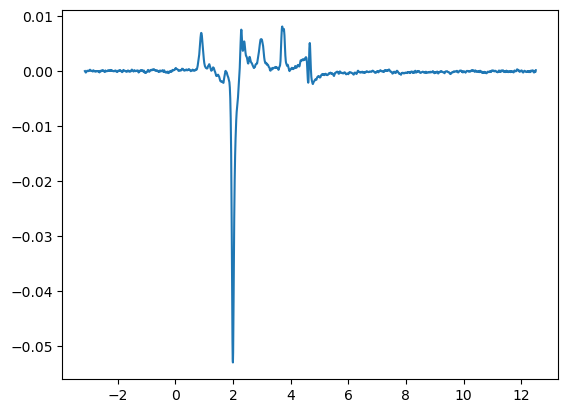

1


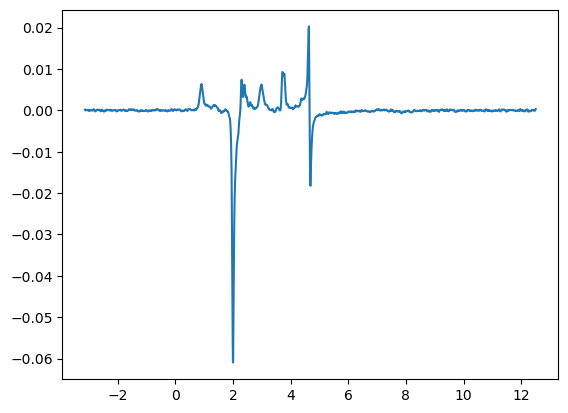

2


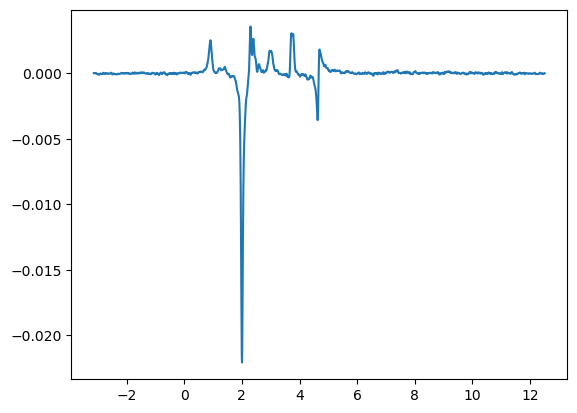

3


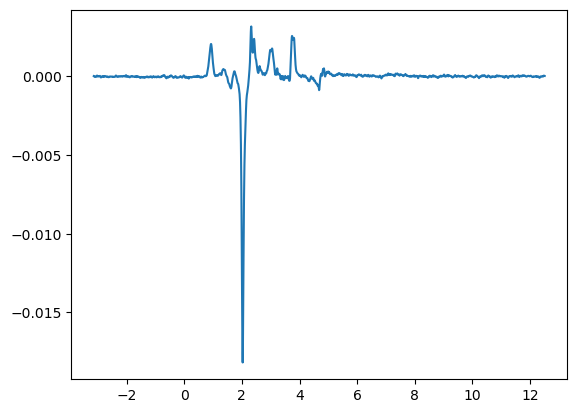

4


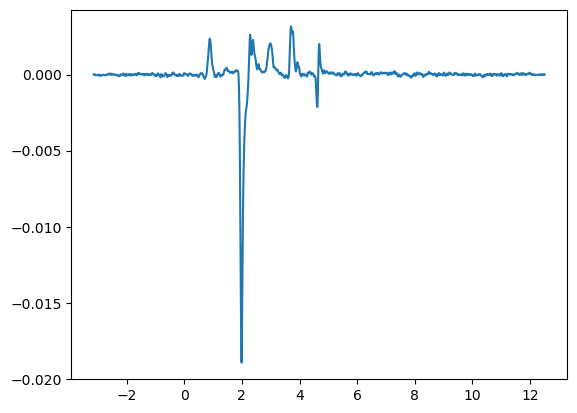

5


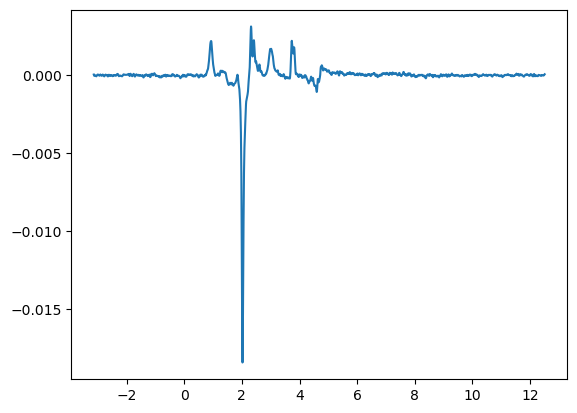

6


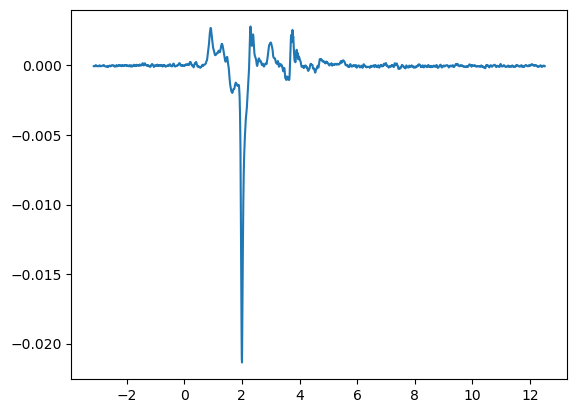

7


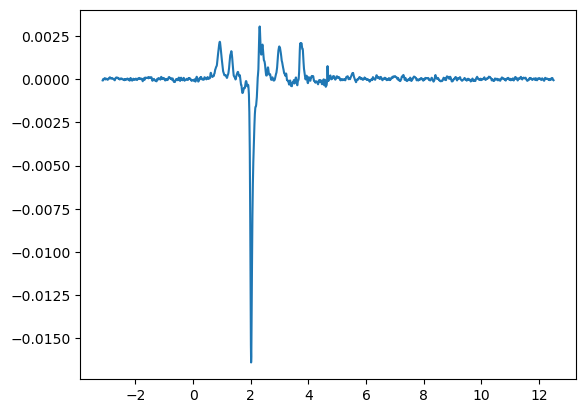

8


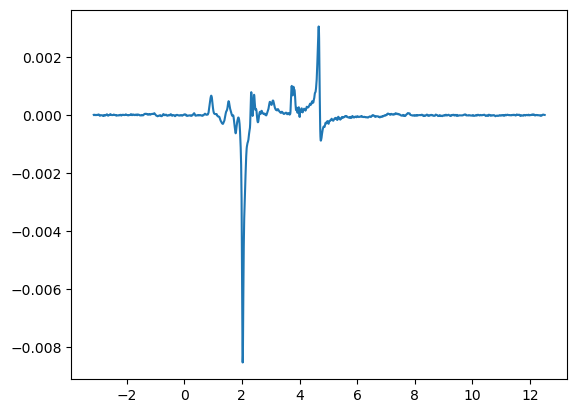

9


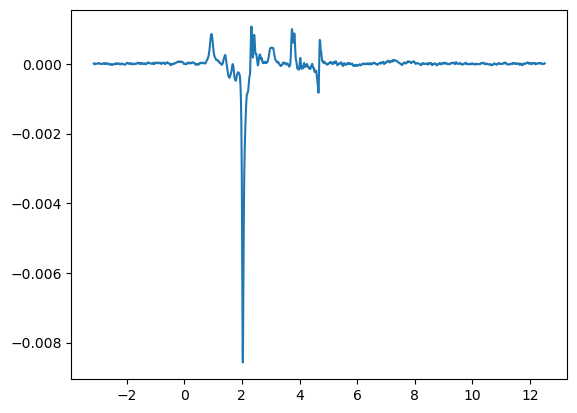

10


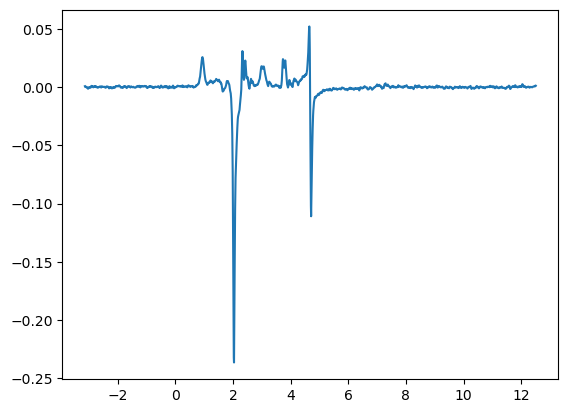

11


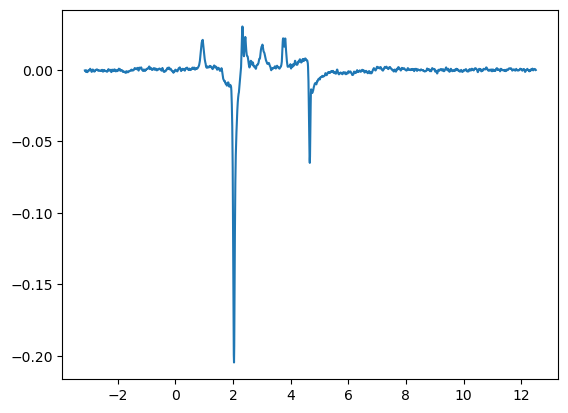

12


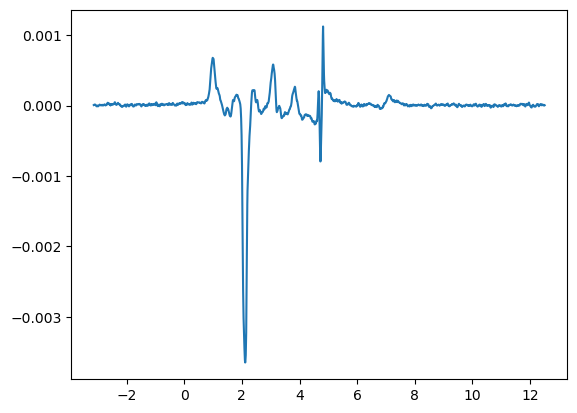

13


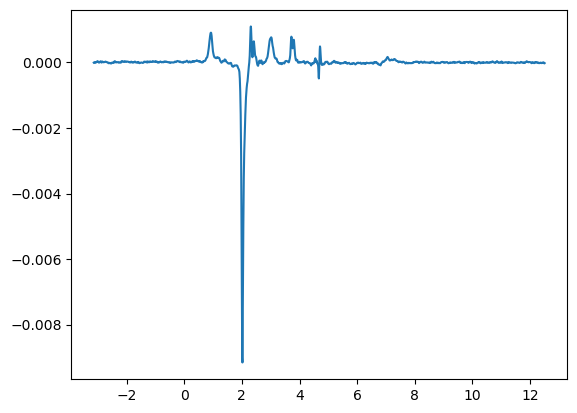

14


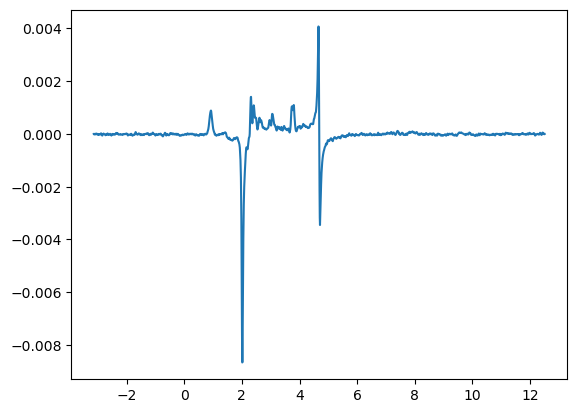

15


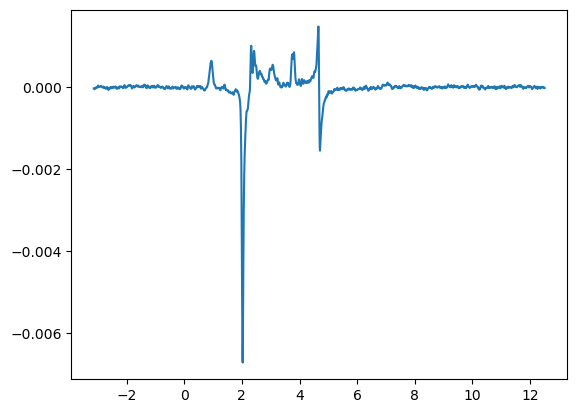

16


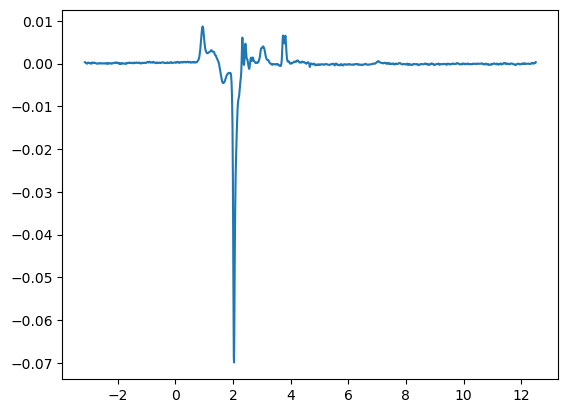

17


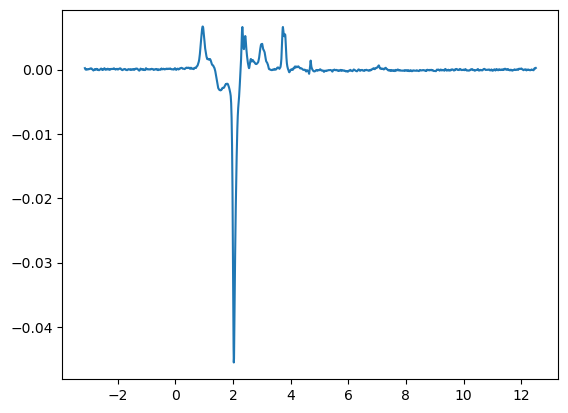

18


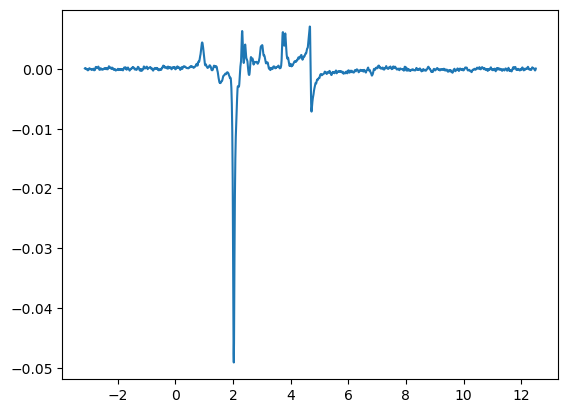

19


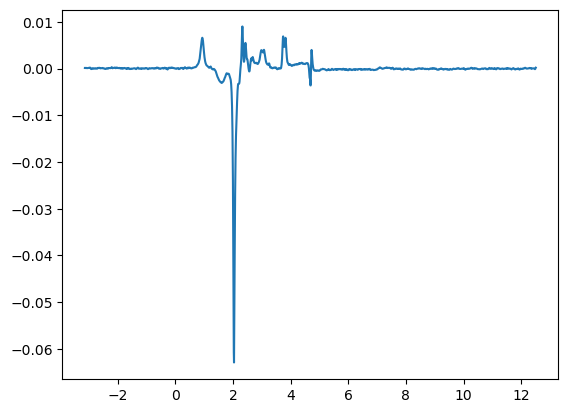

20


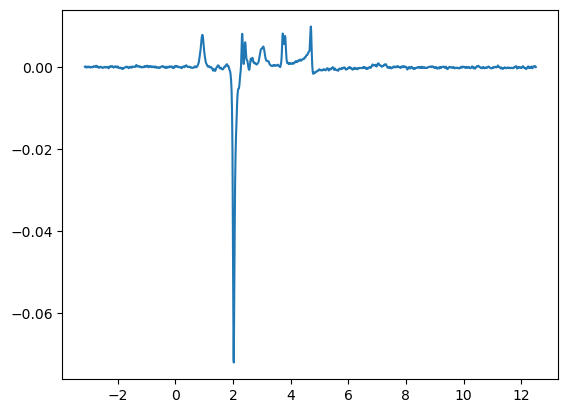

21


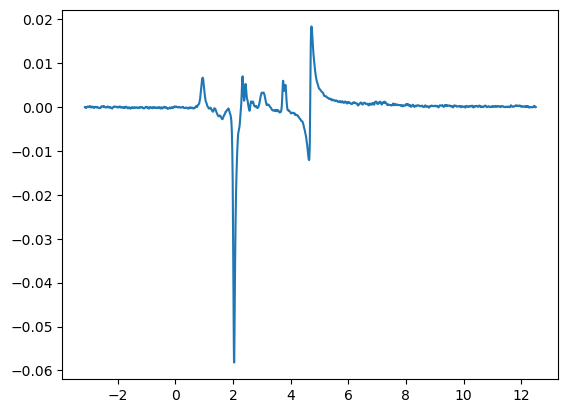

22


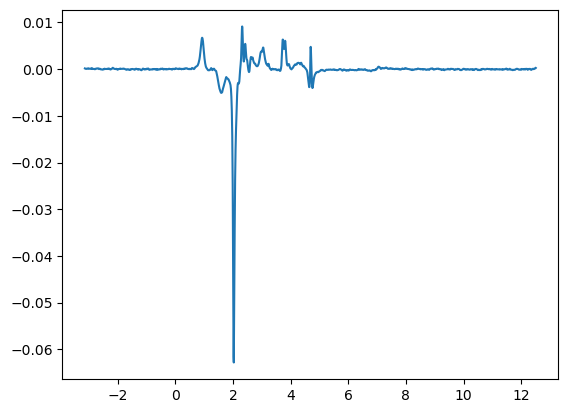

23


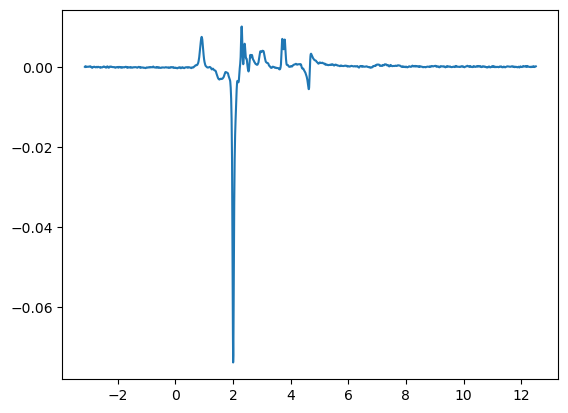

In [6]:
### check file sizes

check_folder = "C:/Users/rodrigo/Documents/thesis/data/splits"

filename = "val_data_split_1.h5"



with h5py.File(f"{check_folder}/{filename}") as hf:
    for i in range(hf["ppm"][()].shape[0]):
        ppm = hf["ppm"][i]
        transient_specs =  hf["transient_specs"][i]
        diff = (transient_specs[:,1,:]-transient_specs[:,0,:]).mean(axis=1)
        print(f'{i}')
        plt.plot(ppm,diff)
        plt.show()